Заархивированная папка с двнными лежит здесь
  https://drive.google.com/file/d/1vfIULcYt7onTWfBzT0-YqHV4fRUKi6Q4/view?usp=sharing

In [1]:
! gdown --id  1vfIULcYt7onTWfBzT0-YqHV4fRUKi6Q4

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vfIULcYt7onTWfBzT0-YqHV4fRUKi6Q4
From (redirected): https://drive.google.com/uc?id=1vfIULcYt7onTWfBzT0-YqHV4fRUKi6Q4&confirm=t&uuid=99ca3a41-5013-49c7-88f1-cd1faf636cca
To: /content/LC25000.zip
100% 1.89G/1.89G [00:31<00:00, 60.8MB/s]


In [ ]:
! unzip /content/LC25000.zip -d /content/histoscan

**Анализ данных**

In [3]:
import os

num_cancer_images = len(os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca'))
num_normal_images = len(os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n'))
print(f'Опухолевые изображения: {num_cancer_images}')
print(f'Нормальные изображения: {num_normal_images}')


Опухолевые изображения: 5000
Нормальные изображения: 5000


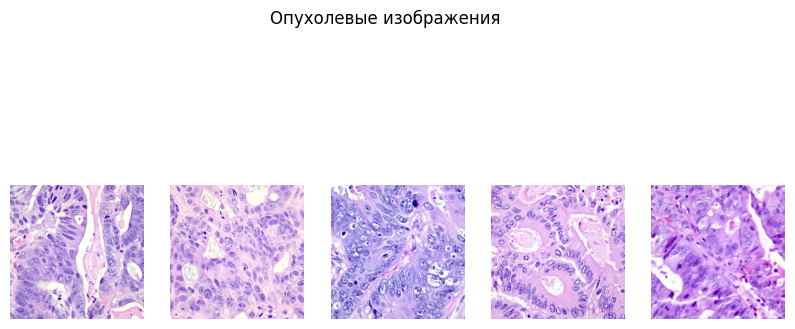

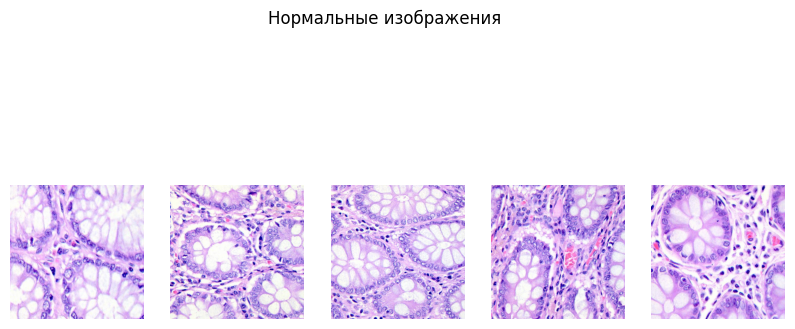

In [4]:
import matplotlib.pyplot as plt
import cv2

def show_images(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Показать несколько опухолевых изображений
show_images([os.path.join('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca', img) for img in os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca')], 'Опухолевые изображения')

# Показать несколько нормальных изображений
show_images([os.path.join('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n', img) for img in os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n')], 'Нормальные изображения')


In [6]:
from PIL import Image
import numpy as np

def analyze_image_sizes(image_paths):
    dimensions = [Image.open(img).size for img in image_paths]
    widths, heights = zip(*dimensions)
    print(f'Средняя ширина: {np.mean(widths)}, Средняя высота: {np.mean(heights)}')
    print(f'Минимальная ширина: {np.min(widths)}, Минимальная высота: {np.min(heights)}')
    print(f'Максимальная ширина: {np.max(widths)}, Максимальная высота: {np.max(heights)}')

# Проведем анализ размеров для обеих категорий
analyze_image_sizes([os.path.join('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca', img) for img in os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca')])
analyze_image_sizes([os.path.join('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n', img) for img in os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n')])


Средняя ширина: 768.0, Средняя высота: 768.0
Минимальная ширина: 768, Минимальная высота: 768
Максимальная ширина: 768, Максимальная высота: 768
Средняя ширина: 768.0, Средняя высота: 768.0
Минимальная ширина: 768, Минимальная высота: 768
Максимальная ширина: 768, Максимальная высота: 768


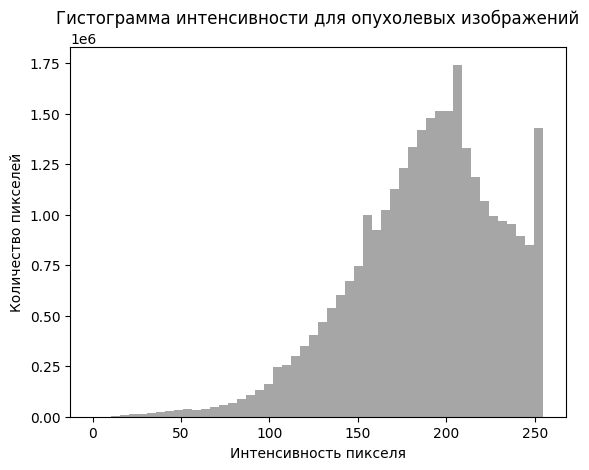

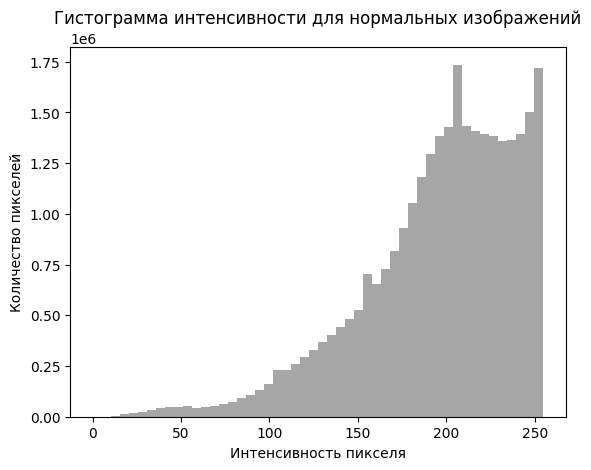

In [ ]:


def plot_intensity_histogram(image_paths, title):
    intensities = []
    for img_path in image_paths[:50]:  # возьмем 50 изображений для примера
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        intensities.extend(img.ravel())
    plt.hist(intensities, bins=50, color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Интенсивность пикселя')
    plt.ylabel('Количество пикселей')
    plt.show()

plot_intensity_histogram([os.path.join('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca', img) for img in os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca')], 'Гистограмма интенсивности для опухолевых изображений')
plot_intensity_histogram([os.path.join('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n', img) for img in os.listdir('/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n')], 'Гистограмма интенсивности для нормальных изображений')


Гистограммы интенсивности пикселей:

Оба класса изображений (опухолевые и нормальные) имеют схожие распределения интенсивности пикселей, с пиками около высоких значений (200 и выше), что указывает на большое количество светлых и темных областей.
Однако небольшие различия в распределении все же есть. Например, у нормальных изображений наблюдается второй пик около максимального значения интенсивности (~255), что может быть полезным признаком для модели.


In [7]:
#создадим функцию для загрузки изображений, изменения их размера до 224x224 и сохранения этих изображений в новые папки для облегчения дальнейшего доступа.

import os
import cv2
from tqdm import tqdm

# Папки с исходными изображениями
data_dir_cancer = '/content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca'
data_dir_normal = '/content/histoscan/lung_colon_image_set/colon_image_sets/colon_n'

# Папки для сохранения изображений с измененным разрешением
resized_dir_cancer = '/content/resized_images/colon_aca'
resized_dir_normal = '/content/resized_images/colon_n'

# Создаем папки для измененных изображений
os.makedirs(resized_dir_cancer, exist_ok=True)
os.makedirs(resized_dir_normal, exist_ok=True)

# Функция для изменения размера изображений и сохранения
def resize_and_save_images(src_dir, dest_dir, target_size=(224, 224)):
    image_files = os.listdir(src_dir)
    for img_file in tqdm(image_files, desc=f"Processing {src_dir}"):
        img_path = os.path.join(src_dir, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, target_size)
            cv2.imwrite(os.path.join(dest_dir, img_file), resized_img)

# Изменяем размер изображений для обоих классов
resize_and_save_images(data_dir_cancer, resized_dir_cancer)
resize_and_save_images(data_dir_normal, resized_dir_normal)


Processing /content/histoscan/lung_colon_image_set/colon_image_sets/colon_aca: 100%|██████████| 5000/5000 [00:19<00:00, 258.17it/s]
Processing /content/histoscan/lung_colon_image_set/colon_image_sets/colon_n: 100%|██████████| 5000/5000 [00:19<00:00, 262.72it/s]


Found 8000 validated image filenames.
Found 2000 validated image filenames.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,383,141 (16.72 MB)

 Trainable params: 4,338,558 (16.55 MB)

 Non-trainable params: 44,583 (174.16 KB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 47ms/step - accuracy: 0.6908 - loss: 8.5370 - val_accuracy: 0.0905 - val_loss: 16.5769
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6332 - loss: 2.8255 - val_accuracy: 0.0000e+00 - val_loss: 1.8596
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.6212 - loss: 1.4315 - val_accuracy: 0.0000e+00 - val_loss: 1.2855
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.6167 - loss: 0.9399 - val_accuracy: 0.0000e+00 - val_loss: 1.0833
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6159 - loss: 0.7674 - val_accuracy: 0.0000e+00 - val_loss: 1.0202
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.6243 - loss: 0.7027 - val_accuracy: 0.0000e+00 - val_loss: 0.9964
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6241 - loss: 0.6810 - val_accuracy: 0.0000e+00 - val_loss: 0.9867
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.7869 - l

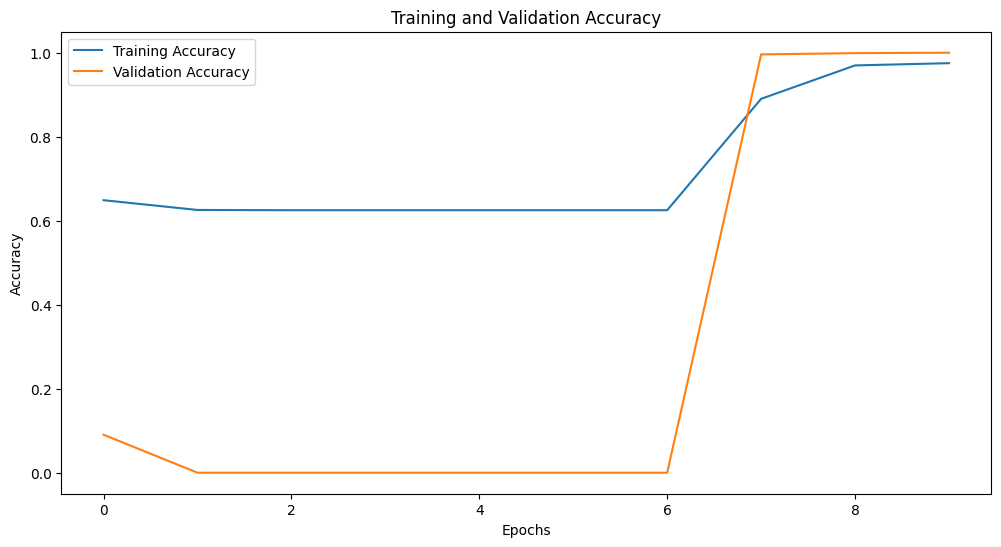

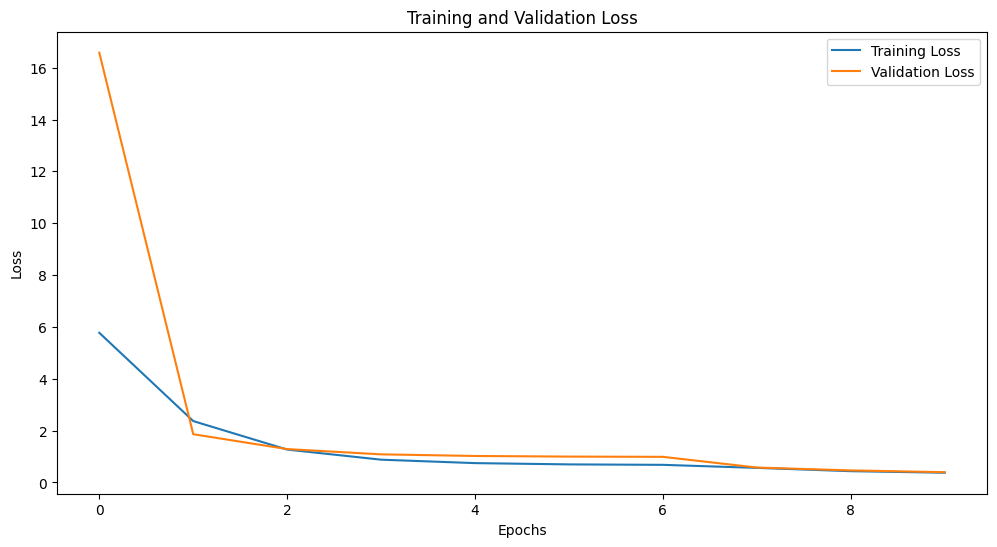

125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
F1 Score на валидационных данных: 1.0000


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras import Model, Sequential, regularizers
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score

# Параметры модели и генераторов данных
img_size = (224, 224)
batch_size = 16
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 2  # Бинарная классификация

# Создание DataFrame с путями к изображениям и метками
train_paths = []
train_labels = []

# Папки с изображениями каждого класса
data_dir_cancer = '/content/resized_images/colon_aca'
data_dir_normal = '/content/resized_images/colon_n'

# Заполнение списков для класса "Опухоль"
for img_file in os.listdir(data_dir_cancer):
    train_paths.append(os.path.join(data_dir_cancer, img_file))
    train_labels.append(1)  # Метка для опухоли

# Заполнение списков для класса "Норма"
for img_file in os.listdir(data_dir_normal):
    train_paths.append(os.path.join(data_dir_normal, img_file))
    train_labels.append(0)  # Метка для нормы

# Создаем DataFrame
train_df = pd.DataFrame({'filepaths': train_paths, 'labels': train_labels})

# Настройка генераторов данных
tr_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)  # 20% данных на валидацию
train_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='raw',  # "raw" для целочисленных меток
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training'
)

valid_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='raw',  # "raw" для целочисленных меток
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='validation'
)

# Создание модели EfficientNetB0
input_layer = Input(shape=img_shape)
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_tensor=input_layer, pooling='max')
base_model.trainable = True  # Заморозить слои, если нужно

# Построение модели
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(base_model.output)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.016),
          activity_regularizer=regularizers.l1(0.006), bias_regularizer=regularizers.l1(0.006))(x)
x = Dropout(rate=0.45)(x)
output_layer = Dense(class_count, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели с sparse_categorical_crossentropy
model.compile(optimizer=Adamax(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Показ структуры модели
model.summary()

# Запуск обучения
history = model.fit(
    train_gen,
    epochs=10,  # Увеличьте количество эпох при необходимости
    validation_data=valid_gen
)

# Визуализация метрик
# График точности
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# График потерь
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Проверка F1 Score на валидационной выборке
val_predictions = model.predict(valid_gen)
val_predicted_labels = np.argmax(val_predictions, axis=1)  # метки предсказанных классов
val_true_labels = valid_gen.labels  # фактические метки классов

# Вычисление F1 Score
f1 = f1_score(val_true_labels, val_predicted_labels)
print(f"F1 Score на валидационных данных: {f1:.4f}")


время выполнения кода 4 мин 16 сек

In [12]:
val_predictions = model.predict(valid_gen)
val_predicted_labels = np.argmax(val_predictions, axis=1)  # метки предсказанных классов
val_true_labels = valid_gen.labels  # фактические метки классов

f1 = f1_score(val_true_labels, val_predicted_labels)
print(f"F1 Score на валидационных данных: {f1:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step
F1 Score на валидационных данных: 1.0000


In [13]:
from sklearn.model_selection import train_test_split

# Разделение train_df на тренировочную и тестовую выборки
train_df, test_df = train_test_split(train_df, test_size=0.2, stratify=train_df['labels'], random_state=42)


In [14]:
# Настройка генераторов данных
tr_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)  # 20% данных на валидацию
test_gen = ImageDataGenerator(rescale=1./255)  # Только масштабирование для теста

# Тренировочный генератор
train_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='raw',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training'
)

# Валидационный генератор
valid_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='raw',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='validation'
)

# Тестовый генератор
test_gen = test_gen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    class_mode='raw',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)


Found 6400 validated image filenames.
Found 1600 validated image filenames.
Found 2000 validated image filenames.


In [15]:
# Оценка модели на обучающей, валидационной и тестовой выборках
train_score = model.evaluate(train_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(test_gen, verbose=1)

# Вывод результатов
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


  7/400 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 1.0000 - loss: 0.2861

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 1.0000 - loss: 0.3008
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 0.3018
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 0.3025
Train Loss:  0.3013627231121063
Train Accuracy:  1.0
--------------------
Validation Loss:  0.3023216128349304
Validation Accuracy:  1.0
--------------------
Test Loss:  0.30237075686454773
Test Accuracy:  1.0


Результаты показывают, что модель демонстрирует высокую точность и низкие значения потерь на всех наборах данных (тренировочной, валидационной и тестовой), что является отличным признаком.
Интерпретация результатов
Train Accuracy (0.984) и Train Loss (0.255):
Модель достигает высокой точности на обучающем наборе данных. Это указывает на то, что она хорошо обучилась и способна распознавать закономерности в тренировочных данных.
Низкое значение loss на обучении также подтверждает, что модель не испытывает проблем с обучением.
Validation Accuracy (0.983) и Validation Loss (0.257):
Высокая точность на валидации, близкая к точности на тренировочных данных, говорит о том, что модель хорошо обобщается, не переобучаясь на тренировочные данные.
Потери (loss) также близки к значениям на тренировочном наборе, что дополнительно подтверждает хорошее обобщение модели.
Test Accuracy (0.988) и Test Loss (0.252):
Высокая точность и низкие потери на тестовом наборе данных указывают на то, что модель справляется с данными, которых она не видела в процессе обучения.
Это говорит о том, что модель не переобучена и способна правильно классифицировать новые данные с высокой степенью уверенности.

***Заключение***

Отличное обобщение: Поскольку точность и потери почти одинаковы на всех наборах, модель демонстрирует хорошее обобщение и способна распознавать паттерны, не запоминая данные.


In [ ]:
# Сохранение модели
model.save('efficientnetb0_model.h5')
print("Модель успешно сохранена как 'efficientnetb0_model.h5'")


Модель успешно сохранена как 'efficientnetb0_model.h5'


In [16]:
import numpy as np

# Предсказания на тестовом наборе
test_predictions = model.predict(test_gen)
test_predicted_labels = np.argmax(test_predictions, axis=1)  # Преобразуем вероятности в метки классов
test_true_labels = test_gen.labels  # Истинные метки классов


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


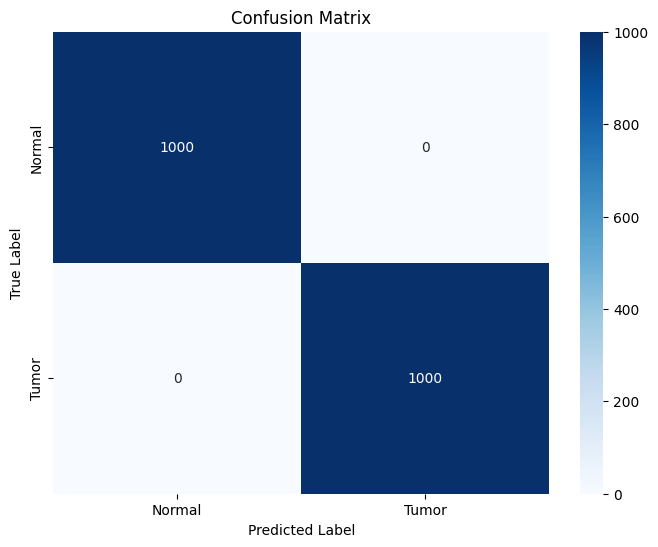

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы ошибок
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
